# **Vietnam Housing Price Analysis**

### Phân tích giá nhà tại Việt Nam

**Description**: This project focuses on analyzing housing prices in Vietnam using real estate data. We will load the dataset, clean and normalize it, perform comprehensive exploratory data analysis, and create insightful visualizations.

**This project covers:**
- Loading housing data from CSV file
- Cleaning and normalizing the data (remove missing values, standardize units)
- Performing analysis using Pandas, Matplotlib, and Seaborn
- Visualizing the results using charts and graphs

**Dataset Columns:**
- Address: Property location
- Area: Property size (m²)
- Frontage: Street frontage width (m)
- Access Road: Road width (m)
- House direction: Facing direction
- Balcony direction: Balcony facing direction  
- Floors: Number of floors
- Bedrooms: Number of bedrooms
- Bathrooms: Number of bathrooms
- Legal status: Property legal documentation
- Furniture state: Furniture condition
- Price: Price in billion VND

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


## **1. Data Collection**

Loading the Vietnam housing dataset from the assets folder.

In [3]:
# Load the housing dataset
housing_df = pd.read_csv('assets/vietnam_housing_dataset.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {housing_df.shape[0]} rows and {housing_df.shape[1]} columns")
housing_df.head(10)

Dataset loaded successfully!
Shape: 30229 rows and 12 columns


,Address,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",84.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,Have certificate,NaN,8.60
1,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",60.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.50
2,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",90.0,6.0,13.0,Đông - Bắc,Đông - Bắc,5.0,NaN,NaN,Sale contract,NaN,8.90
3,"Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...",54.0,NaN,3.5,Tây - Nam,Tây - Nam,2.0,2.0,3.0,Have certificate,Full,5.35
4,"Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh",92.0,NaN,NaN,Đông - Nam,Đông - Nam,2.0,4.0,4.0,Have certificate,Full,6.90
5,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",91.0,7.0,13.0,Tây - Bắc,NaN,NaN,NaN,NaN,Have certificate,NaN,9.80
6,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",64.0,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,7.20
7,"Dự án Him Lam Thường Tín, Huyện Thường Tín, Hà...",74.0,5.0,18.0,Nam,Nam,5.0,4.0,5.0,Have certificate,NaN,9.90
8,"Dự án The Empire - Vinhomes Ocean Park 2, Xã L...",48.0,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,Basic,5.70
9,"Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...",91.0,7.0,NaN,NaN,NaN,5.0,NaN,NaN,Have certificate,NaN,9.50


## **2. Data Understanding**

Let's explore the structure, data types, and basic statistics of our housing dataset.

In [4]:
# Display dataset information
print("Dataset Information:")
print("=" * 60)
housing_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30229 entries, 0 to 30228
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            30229 non-null  object 
 1   Area               30229 non-null  float64
 2   Frontage           18665 non-null  float64
 3   Access Road        16932 non-null  float64
 4   House direction    8990 non-null   object 
 5   Balcony direction  5246 non-null   object 
 6   Floors             26626 non-null  float64
 7   Bedrooms           25067 non-null  float64
 8   Bathrooms          23155 non-null  float64
 9   Legal status       25723 non-null  object 
 10  Furniture state    16110 non-null  object 
 11  Price              30229 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


In [5]:
# Statistical summary of numeric columns
housing_df.describe()

,Area,Frontage,Access Road,Floors,Bedrooms,Bathrooms,Price
count,30229.000000,18665.000000,16932.000000,26626.000000,25067.000000,23155.000000,30229.000000
mean,68.498741,5.361692,7.853800,3.410426,3.511030,3.346837,5.872078
std,48.069835,4.346174,7.451313,1.328897,1.309116,1.400181,2.211877
min,3.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,40.000000,4.000000,4.000000,2.000000,3.000000,2.000000,4.200000
50%,56.000000,4.500000,6.000000,3.000000,3.000000,3.000000,5.900000
75%,80.000000,5.000000,10.000000,4.000000,4.000000,4.000000,7.500000
max,595.000000,77.000000,85.000000,10.000000,9.000000,9.000000,11.500000


## **3. Data Cleaning and Normalization**

Checking for missing values, handling duplicates, and normalizing the data.

In [6]:
# Check for missing values
print("Missing values in each column:")
print("=" * 60)
missing_counts = housing_df.isnull().sum()
missing_percentages = round((housing_df.isnull().sum() / len(housing_df)) * 100, 2)

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing Count': missing_counts.values,
    'Missing Percentage (%)': missing_percentages.values
})

missing_df[missing_df['Missing Count'] > 0]

Missing values in each column:


,Column,Missing Count,Missing Percentage (%)
2,Frontage,11564,38.25
3,Access Road,13297,43.99
4,House direction,21239,70.26
5,Balcony direction,24983,82.65
6,Floors,3603,11.92
7,Bedrooms,5162,17.08
8,Bathrooms,7074,23.40
9,Legal status,4506,14.91
10,Furniture state,14119,46.71


In [7]:
# Check for duplicates
duplicates_count = housing_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

if duplicates_count > 0:
    housing_df = housing_df.drop_duplicates()
    print(f"Removed {duplicates_count} duplicate rows.")
else:
    print("No duplicate rows found!")

Number of duplicate rows: 0
No duplicate rows found!


In [8]:
# Create a working copy
housing_clean = housing_df.copy()

# Handle missing values for numeric columns (fill with median)
numeric_cols = housing_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if housing_clean[col].isnull().sum() > 0:
        housing_clean[col].fillna(housing_clean[col].median(), inplace=True)

# Handle missing values for categorical columns (fill with mode or 'Unknown')
categorical_cols = housing_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Address' and housing_clean[col].isnull().sum() > 0:
        if housing_clean[col].mode().empty:
            housing_clean[col].fillna('Unknown', inplace=True)
        else:
            housing_clean[col].fillna(housing_clean[col].mode()[0], inplace=True)

print("Data cleaning completed!")
print(f"\nRemaining missing values:")
print(housing_clean.isnull().sum().sum())

Data cleaning completed!

Remaining missing values:
0


## **4. Exploratory Data Analysis (EDA)**

Let's analyze the housing data to uncover patterns, relationships, and insights.

In [9]:
# Price statistics
print("Housing Price Statistics (in billion VND):")
print("=" * 60)
print(f"Mean Price: {housing_clean['Price'].mean():.2f} billion VND")
print(f"Median Price: {housing_clean['Price'].median():.2f} billion VND")
print(f"Min Price: {housing_clean['Price'].min():.2f} billion VND")
print(f"Max Price: {housing_clean['Price'].max():.2f} billion VND")
print(f"Std Dev: {housing_clean['Price'].std():.2f} billion VND")

Housing Price Statistics (in billion VND):
Mean Price: 5.87 billion VND
Median Price: 5.90 billion VND
Min Price: 1.00 billion VND
Max Price: 11.50 billion VND
Std Dev: 2.21 billion VND


In [10]:
# Correlation matrix for numeric features
numeric_features = housing_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()

print("Correlation with Price:")
print("=" * 60)
print(correlation_matrix['Price'].sort_values(ascending=False))

Correlation with Price:
Price          1.000000
Bathrooms      0.363963
Bedrooms       0.332543
Floors         0.309113
Access Road    0.113017
Area           0.097593
Frontage       0.038675
Name: Price, dtype: float64


## **5. Data Visualization**

Creating comprehensive visualizations to understand the housing market better.

### 5.1 Price Distribution

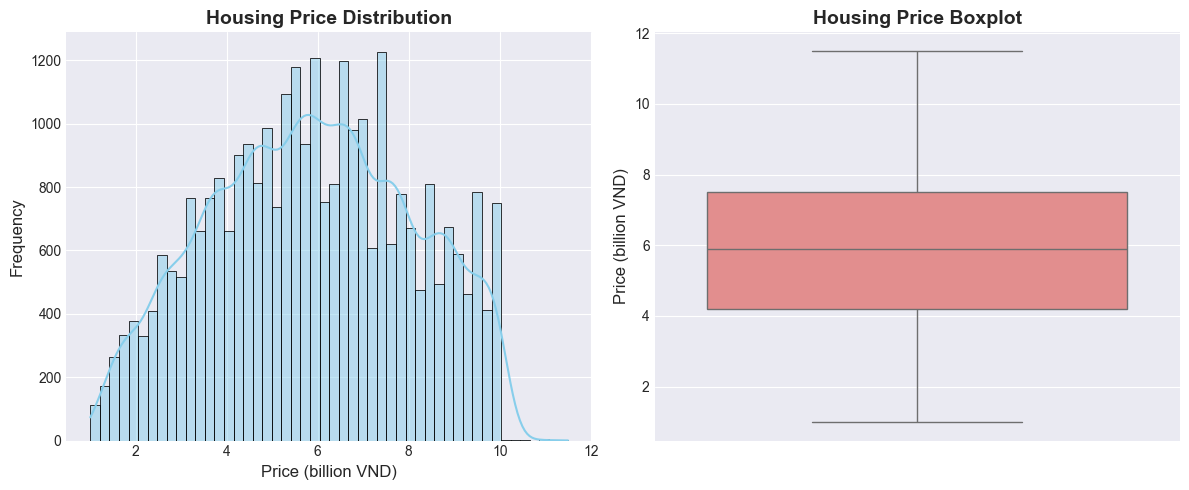

In [11]:
# Price distribution histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=housing_clean, x='Price', bins=50, kde=True, color='skyblue')
plt.title('Housing Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Price (billion VND)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(y=housing_clean['Price'], color='lightcoral')
plt.title('Housing Price Boxplot', fontsize=14, fontweight='bold')
plt.ylabel('Price (billion VND)', fontsize=12)

plt.tight_layout()
plt.show()

### 5.2 Area vs Price Relationship

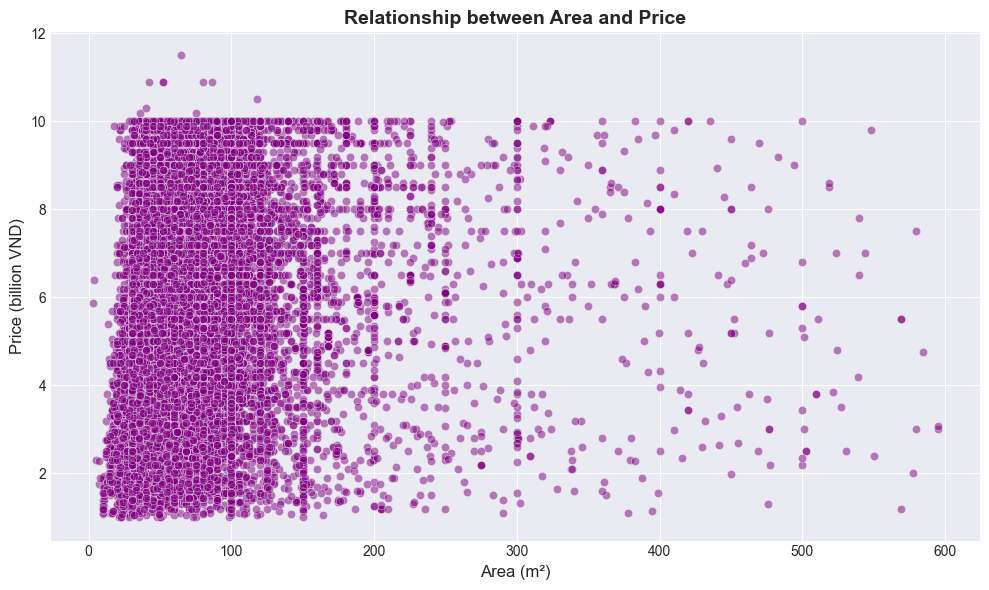

In [12]:
# Scatter plot: Area vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_clean, x='Area', y='Price', alpha=0.5, color='purple')
plt.title('Relationship between Area and Price', fontsize=14, fontweight='bold')
plt.xlabel('Area (m²)', fontsize=12)
plt.ylabel('Price (billion VND)', fontsize=12)
plt.tight_layout()
plt.show()

### 5.3 Correlation Heatmap

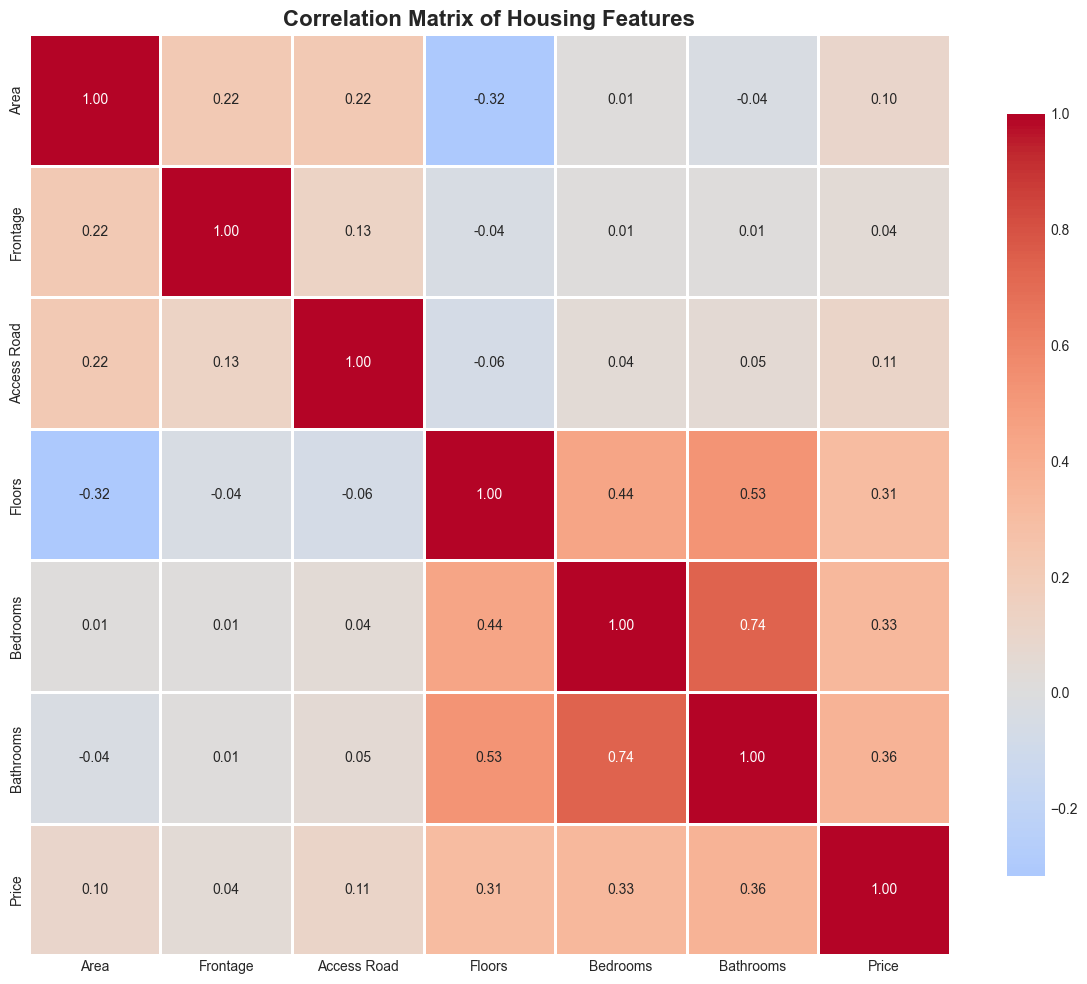

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Matrix of Housing Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.4 Price by Bedrooms and Bathrooms

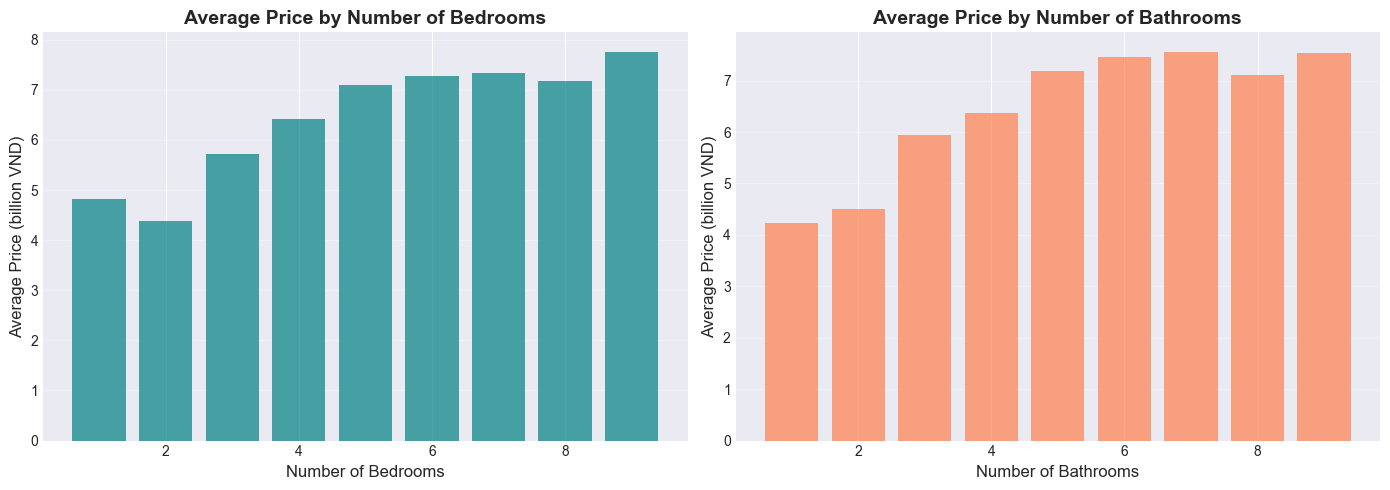

In [14]:
# Average price by number of bedrooms and bathrooms
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# By Bedrooms
bedroom_price = housing_clean.groupby('Bedrooms')['Price'].mean().sort_index()
axes[0].bar(bedroom_price.index, bedroom_price.values, color='teal', alpha=0.7)
axes[0].set_title('Average Price by Number of Bedrooms', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Bedrooms', fontsize=12)
axes[0].set_ylabel('Average Price (billion VND)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# By Bathrooms
bathroom_price = housing_clean.groupby('Bathrooms')['Price'].mean().sort_index()
axes[1].bar(bathroom_price.index, bathroom_price.values, color='coral', alpha=0.7)
axes[1].set_title('Average Price by Number of Bathrooms', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Bathrooms', fontsize=12)
axes[1].set_ylabel('Average Price (billion VND)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 5.5 Price by Legal Status and Furniture State

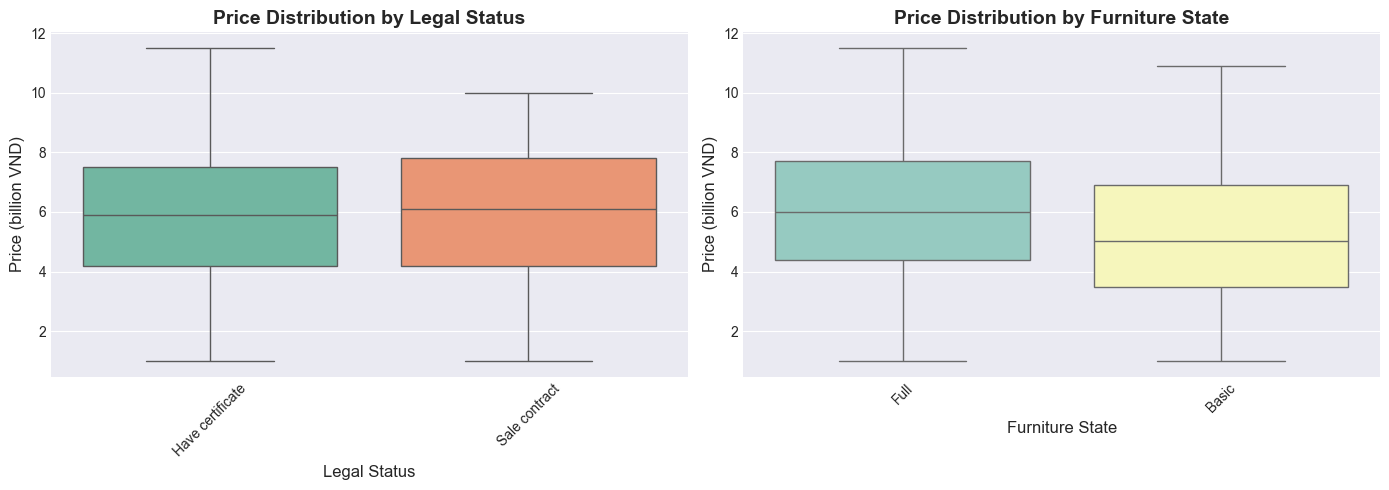

In [15]:
# Price distribution by categorical features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# By Legal Status
legal_status_data = housing_clean[housing_clean['Legal status'].notna()]
sns.boxplot(data=legal_status_data, x='Legal status', y='Price', ax=axes[0], palette='Set2')
axes[0].set_title('Price Distribution by Legal Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Legal Status', fontsize=12)
axes[0].set_ylabel('Price (billion VND)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# By Furniture State
furniture_data = housing_clean[housing_clean['Furniture state'].notna()]
sns.boxplot(data=furniture_data, x='Furniture state', y='Price', ax=axes[1], palette='Set3')
axes[1].set_title('Price Distribution by Furniture State', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Furniture State', fontsize=12)
axes[1].set_ylabel('Price (billion VND)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **6. Key Insights and Summary**

Based on our analysis of the Vietnam housing dataset, here are the key findings:

In [16]:
# Generate summary statistics
print("=" * 70)
print("VIETNAM HOUSING MARKET ANALYSIS - KEY INSIGHTS")
print("=" * 70)
print()

print("1. DATASET OVERVIEW:")
print(f"   - Total properties analyzed: {len(housing_clean):,}")
print(f"   - Features examined: {len(housing_clean.columns)}")
print()

print("2. PRICE INSIGHTS:")
print(f"   - Average price: {housing_clean['Price'].mean():.2f} billion VND")
print(f"   - Price range: {housing_clean['Price'].min():.2f} - {housing_clean['Price'].max():.2f} billion VND")
print()

print("3. PROPERTY CHARACTERISTICS:")
print(f"   - Average area: {housing_clean['Area'].mean():.2f} m²")
print(f"   - Average bedrooms: {housing_clean['Bedrooms'].mean():.2f}")
print(f"   - Average bathrooms: {housing_clean['Bathrooms'].mean():.2f}")
print(f"   - Average floors: {housing_clean['Floors'].mean():.2f}")
print()

print("4. STRONGEST CORRELATIONS WITH PRICE:")
correlations_with_price = correlation_matrix['Price'].drop('Price').sort_values(ascending=False)
print(f"   - {correlations_with_price.index[0]}: {correlations_with_price.values[0]:.3f}")
print(f"   - {correlations_with_price.index[1]}: {correlations_with_price.values[1]:.3f}")
print(f"   - {correlations_with_price.index[2]}: {correlations_with_price.values[2]:.3f}")
print()

print("5. DATA QUALITY:")
missing_before = housing_df.isnull().sum().sum()
missing_after = housing_clean.isnull().sum().sum()
print(f"   - Missing values handled: {missing_before} → {missing_after}")
print(f"   - Data completeness: {((1 - missing_after / housing_clean.size) * 100):.2f}%")
print()

print("=" * 70)
print("Analysis completed successfully!")
print("=" * 70)

VIETNAM HOUSING MARKET ANALYSIS - KEY INSIGHTS

1. DATASET OVERVIEW:
   - Total properties analyzed: 30,229
   - Features examined: 12

2. PRICE INSIGHTS:
   - Average price: 5.87 billion VND
   - Price range: 1.00 - 11.50 billion VND

3. PROPERTY CHARACTERISTICS:
   - Average area: 68.50 m²
   - Average bedrooms: 3.42
   - Average bathrooms: 3.27
   - Average floors: 3.36

4. STRONGEST CORRELATIONS WITH PRICE:
   - Bathrooms: 0.364
   - Bedrooms: 0.333
   - Floors: 0.309

5. DATA QUALITY:
   - Missing values handled: 105547 → 0
   - Data completeness: 100.00%

Analysis completed successfully!
